Disk under diametrical compression

Problem statement: A circular disk or cylinder loaded by equal but opposite concentrated forces along a given diameter.
    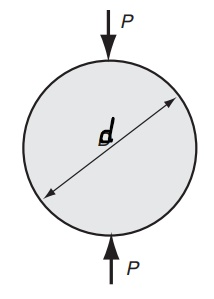
    
    Solution
    Assumptions:

    a)Disc is made of homogenous, isotrophic material.
    b)Region of study excludes the point at which concentrated load(P) is applied.
    c)
    d)Load P is considered to be distributed uniformly across the disc of unit thickness. Stresses along Z direction doesn't    varies, i.e problem is plane stress problem.
    e)Loading condtion, boundary condition, material properties are symmetric about axis passing through loads. Hence stresses are also symmetrical(mirror images) about this axis.
   
   Concept required:

    A) From flament problem (half space, concentrated laod):
  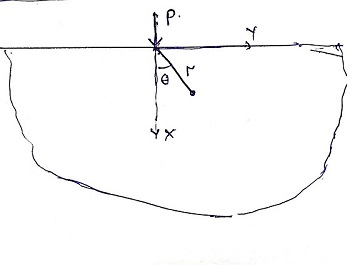
    
    In given flament problem load P acts on surface of half space region. Half space region exits from -infinity to infinity along X axis and form 0 to infinity along Y axis.
    

    Solution
    Assumptions:
      
        a)Disc is made of homogenous, isotrophic material.
        b)Region of study excludes the point at which concentrated load(P) is applied.
        c)
        d)Load P is considered to be distributed uniformly across the disc of unit thickness. Stresses along Z direction doesn't varies, i.e problem is plane stress problem.
        e)Loading condtion, boundary condition, material properties are symmetric about axis passing through loads. Hence stresses are also symmetrical(mirror images) about this axis.
  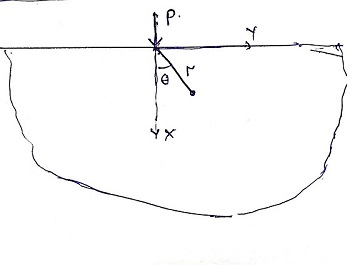

    Boundary conditions:
    For semicircular arc
    
    equation to be written.
    
    Equlibrium in vertical direction
$ \int_a^b \sigma_{rr} \\ $ $\\\rm rd𝜃\ $=-P
where a=-𝜋/2 and b=𝜋/2
    
    R.H.S. is of above equation is independent of r and theta. Therefore L.H.S. should also be. Integration over theta in L.H.S. eliminate theta terms hence to eliminiate r terms, stress along radial direction should be as
$$ \frac{h(θ)}{r}\  $$
    Let us start with defining polarutilities required.

In [2]:
import sympy as sym

r , theta = sym.symbols('r,theta')

delr_delx = sym.cos(theta)
delr_dely = sym.sin(theta)
deltheta_delx = -sym.sin(theta)/r
deltheta_dely = sym.cos(theta)/r

def del_delx(f):
    return delr_delx*sym.diff(f,r) +deltheta_delx*sym.diff(f,theta)
def del_dely(f):
    return delr_dely*sym.diff(f,r) +deltheta_dely*sym.diff(f,theta)

def del2_delx2(f):
    return del_delx(del_delx(f))
def del2_dely2(f):
    return del_dely(del_dely(f))

def polarLaplacian(f):
    return (del2_delx2(f) + del2_dely2(f)).simplify()

def polarbiharmonic(f):
    return polarLaplacian(polarLaplacian(f))

def sigma_xx(f):
    return del2_dely2(f)
def sigma_yy(f):
    return del2_delx2(f)
def sigma_xy(f):
    return -del_delx(del_dely(f))

def sigma_rect(f):
    return sym.Matrix([[sigma_xx(f), sigma_xy(f)],[sigma_xy(f) , sigma_yy(f)]])

Q = sym.Matrix([[sym.cos(theta) , sym.sin(theta)],[-sym.sin(theta) , sym.cos(theta)]])

def sigma_polar(f):
    return Q*sigma_rect(f)*(Q.T)

def sigma_rr(f):
    return (sigma_polar(f)[0,0]).simplify().expand()
def sigma_tt(f):
    return (sigma_polar(f)[1,1]).simplify()
def sigma_rt(f):
    return (sigma_polar(f)[0,1]).simplify().expand()
def sigma_tr(f):
    return (sigma_polar(f)[1,0]).simplify().expand()

In [8]:
from IPython.display import Math, Latex

In [9]:
phi = sym.Function('varphi')(r,theta)
sigma_rr(phi)

Derivative(varphi(r, theta), r)/r + Derivative(varphi(r, theta), (theta, 2))/r**2

So, if our unknown Airy stress function is φ, we must have:

$$ \frac{1}{r} \frac{\partial φ}{\partial r}+ \frac{1}{r^2} \frac{\partial ^2φ}{\partial θ^2} =\frac{h(θ)}{r}\  $$,
from which we obtain:
$$ \frac{\partial φ}{\partial r}+ \frac{1}{r} \frac{\partial^2 φ}{\partial θ^2} = h(θ) $$.
R.H.S is dependent on θ only. Hence,L.H.S. also depend on  θ.
From the above, we can deduce that φ must be of the form φ=rg(θ). We set it up in our code:

In [10]:
g = sym.Function('g')(theta)
phi = r*g
display(Math(r'\varphi = {}'.format(sym.latex(phi))))

<IPython.core.display.Math object>

Next, we take the biharmonic of this ϕ to be zero.

In [11]:
Eq = sym.Eq(polarbiharmonic(phi),0)
display(Eq)

Eq((g(theta) + 2*Derivative(g(theta), (theta, 2)) + Derivative(g(theta), (theta, 4)))/r**3, 0)

In [12]:
sym.dsolve(polarbiharmonic(phi))

Eq(g(theta), (C1 + C2*theta)*exp(-I*theta) + (C3 + C4*theta)*exp(I*theta))

We rewrite g(θ) in a slightly different form as follows:

In [13]:
A, B, C, D = sym.symbols('A, B, C, D')
gnew = A*sym.cos(theta) + B*theta*sym.cos(theta) + C*sym.sin(theta) + D*theta*sym.sin(theta)
display(Math(r'g(\theta) = {}'.format(sym.latex(gnew))))

<IPython.core.display.Math object>

Next, we find the expressions of $\sigma_{{rr}}\,\sigma_{{tt}}\ and  \sigma_{{rt}}\$  as follows:

In [14]:
phi = r*gnew
sigmarr = sigma_rr(phi)
display(Math(r'\sigma_{{rr}} = {}'.format(sym.latex(sigmarr))))

sigmatt = sigma_tt(phi)
display(Math(r'\sigma_{{\theta\theta}} = {}'.format(sym.latex(sigmatt))))

sigmart = sigma_rt(phi)
display(Math(r'\sigma_{{r\theta}} = {}'.format(sym.latex(sigmart))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Comparing the form of σrr just obtained with the previous general form $ \sigma_{{rr}}\ $= h(θ)/r, we find that h(θ)=−2Bsinθ+2Dcosθ. h(θ) must be symmetric in about vertical axis that is about θ=0 as $\sigma_{{rr}}\$ is symmetric about it. Therefore, we must have B=0. Consequently, the expression of σrr becomes:

In [15]:
sigmarr = sigmarr.subs(B,0)
display(Math(r'\sigma_{{rr}} = {}'.format(sym.latex(sigmarr))))

<IPython.core.display.Math object>

The unknown D can be readily found by using the "force-balance" condition. Thus, we have:
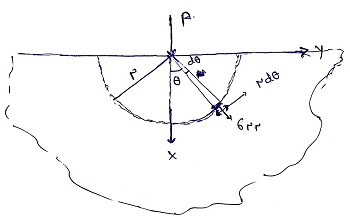

In [16]:
P = sym.symbols('P')
lhs = sym.integrate(r*sigmarr*sym.cos(theta),(theta,-sym.pi/2,sym.pi/2))
rhs = -P
eq = sym.Eq(lhs,rhs)
display(eq)

Eq(pi*D, -P)

The solution for D can be easily found now:

In [17]:
Dsoln = -P/sym.pi
display(Math(r'D = {}'.format(sym.latex(Dsoln))))

<IPython.core.display.Math object>

Finally, we can find the expression of σrr:

In [18]:
sigmarr_soln = sigmarr.subs(D,Dsoln)
display(Math(r'\sigma_{{rr}}^{{\rm soln}} = {}'.format(sym.latex(sigmarr_soln))))

<IPython.core.display.Math object>

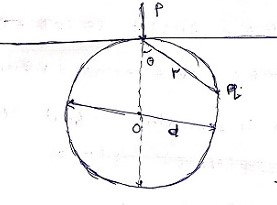
Consider a poin q on cicumference of circle as shown. For any of this point we know that

$$\frac{cos\theta}{r} = \frac{1}{d} $$
Stress on this circle is

In [19]:
display(Math(r'\sigma_{{rr}} = {}'.format(sym.latex(sigmarr_soln))))

<IPython.core.display.Math object>

From above two equations we can $\sigma_{{rr}}\$ as 

In [20]:
d = sym.symbols('d')
sigmarr_c = -2*P/(sym.pi*d)
display(Math(r'\sigma_{{rr}}^{{c}} = {}'.format(sym.latex(sigmarr_c))))

<IPython.core.display.Math object>

c deonotes $ \sigma_{{rr}}\ $ over circle shown
Results:

   $ \sigma_{{rr}}\ $ is along direction of r vector,
   Magnititude of $ \sigma_{{rr}}\ $ is constant along the circle. This results drawn can be used to solve our present problem

 Diagram for present problem can shown as
 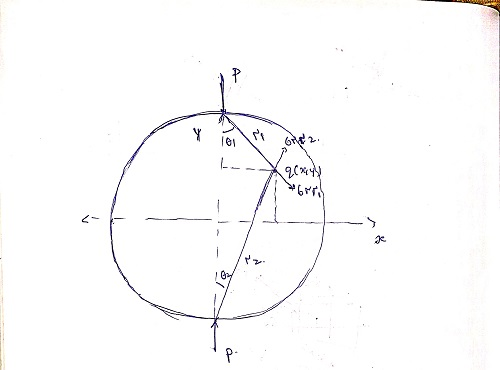

Here $ \sigma_{{rr}}^{{1}}\ $ and $ \sigma_{{rr}}^{{2}}\ $ are stress generated at point q by Load P(downward one) and load P(upward direction one) along the r1 and r2 direction as shown.

In [21]:
r1,theta1,r2,theta2 = sym.symbols('r1,theta1,r2,theta2')
sigmarr_1 = -2*P*sym.cos(theta1)/(sym.pi*r1)
sigmarr_2 = -2*P*sym.cos(theta2)/(sym.pi*r2)
display(Math(r'\sigma_{{rr}}^{{1}} = {}'.format(sym.latex(sigmarr_1))))
display(Math(r'\sigma_{{rr}}^{{2}} = {}'.format(sym.latex(sigmarr_2))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Now to find stressed at point q in simplified by let us find stresses along X and Y direction proudced by  $ \sigma_{{rr}}^{{1}}\ $ and $ \sigma_{{rr}}^{{2}}\ $ through CORDINATE TRANSORM method. For $ \sigma_{{rr}}^{{1}}\ $:   $$\theta = -(90-\theta_1) $$
where θ is angle through which element needed to be roatate.

In [22]:
theta = -(sym.pi/2-theta1)
sigma_polar = sym.Matrix([[sigmarr_1, 0],[0 , 0]])

Q = sym.Matrix([[sym.cos(theta) , sym.sin(theta)],[-sym.sin(theta) , sym.cos(theta)]])

sigma_rect = (Q.T)*sigma_polar*(Q)
sigma_xx1 = (sigma_rect[0,0]).simplify().expand()
sigma_yy1 =  (sigma_rect[1,1]).simplify()
sigma_xy1 = (sigma_rect[0,1]).simplify().expand()
sigma_yx1 = (sigma_rect[1,0]).simplify().expand()
display(Math(r'\sigma_{{xx}}^{{1}} = {}'.format(sym.latex(sigma_xx1))))
display(Math(r'\sigma_{{yy}}^{{1}} = {}'.format(sym.latex(sigma_yy1))))
display(Math(r'\sigma_{{xy}}^{{1}} = {}'.format(sym.latex(sigma_xy1))))



<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

from geometry  VALUE OF $\cos\theta_1 and \cos\theta_2 \sin\theta_1  \sin\theta_2$   and R = d/2    also value of r1 and r2 in x,y

In [23]:
R,x,y = sym.symbols('R,x,y')

In [24]:
sigmaxx_1 = sigma_xx1.subs([(sym.sin(theta1),x/r1),(sym.cos(theta1),(R-y)/r1)])
sigmayy_1 = sigma_yy1.subs([(sym.sin(theta1),x/r1),(sym.cos(theta1),(R-y)/r1)])
sigmaxy_1 = sigma_xy1.subs([(sym.sin(theta1),x/r1),(sym.cos(theta1),(R-y)/r1)])
display(Math(r'\sigma_{{xx}}^{{1}} = {}'.format(sym.latex(sigmaxx_1))))
display(Math(r'\sigma_{{yy}}^{{1}} = {}'.format(sym.latex(sigmayy_1))))
display(Math(r'\sigma_{{xy}}^{{1}} = {}'.format(sym.latex(sigmaxy_1))))




<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

For find stress along X and Y  produced by $ \sigma_{{rr}}^{{2}}\ $: θ = 90-θ2

In [25]:
theta = (sym.pi/2-theta2)
sigma_polar = sym.Matrix([[sigmarr_2, 0],[0 , 0]])

Q = sym.Matrix([[sym.cos(theta) , sym.sin(theta)],[-sym.sin(theta) , sym.cos(theta)]])

sigma_rect = (Q.T)*sigma_polar*(Q)
sigma_xx2 = (sigma_rect[0,0]).simplify().expand()
sigma_yy2 =  (sigma_rect[1,1]).simplify()
sigma_xy2 = (sigma_rect[0,1]).simplify().expand()
sigma_yx2 = (sigma_rect[1,0]).simplify().expand()
display(Math(r'\sigma_{{xx}}^{{2}} = {}'.format(sym.latex(sigma_xx2))))
display(Math(r'\sigma_{{yy}}^{{2}} = {}'.format(sym.latex(sigma_yy2))))
display(Math(r'\sigma_{{xy}}^{{2}} = {}'.format(sym.latex(sigma_xy2))))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [26]:
sigmaxx_2 = sigma_xx2.subs([(sym.sin(theta2),x/r2),(sym.cos(theta2),(R+y)/r2)])
sigmayy_2 = sigma_yy2.subs([(sym.sin(theta2),x/r2),(sym.cos(theta2),(R+y)/r2)])
sigmaxy_2 = sigma_xy2.subs([(sym.sin(theta2),x/r2),(sym.cos(theta2),(R+y)/r2)])
display(Math(r'\sigma_{{xx}}^{{2}} = {}'.format(sym.latex(sigmaxx_2))))
display(Math(r'\sigma_{{yy}}^{{2}} = {}'.format(sym.latex(sigmayy_2))))
display(Math(r'\sigma_{{xy}}^{{2}} = {}'.format(sym.latex(sigmaxy_2))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

When the point q is on circumference of disc we can note that $ \sigma_{{rr}}^{{1}}\ $ and $ \sigma_{{rr}}^{{2}}\ $ are perpendicular to each other and are of same magnitude as

$$ \frac{-2P}{πd}\ $$

Thus both this stress construct a point mohr's circle at that point.we can conclude that at any direction on circumference stress is of above magnitude. However we know form boundary condition of our problem that no stress act in radial direction (from centre of disc to point q). Hence to satify this condition we assume a unform radial loading is acting on surface of disc which produce stress of magnitude as shown

$$ \frac{2P}{πd}\ $$
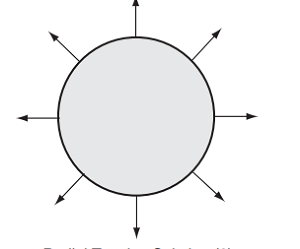


we know this uniform stress acting on disc behaves as hydrostatic load due to inner radius of disc is zero. Hence it produces same stress in direction and at all point inside of disc. We can directly write vaules of stress along  X and Y direction for this loading condition as:

In [27]:
sigmaxx_3 = 2*P/(sym.pi*d)
sigmayy_3 = 2*P/(sym.pi*d)
sigmaxy_3 = 0
display(Math(r'\sigma_{{xx}}^{{3}} = {}'.format(sym.latex(sigmaxx_3))))
display(Math(r'\sigma_{{yy}}^{{3}} = {}'.format(sym.latex(sigmayy_3))))
display(Math(r'\sigma_{{xy}}^{{3}} = {}'.format(sym.latex(sigmaxy_3))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

From principle of superimposition we can say that:

In [28]:
sigmaxx_s = sigmaxx_1 +sigmaxx_2 +sigmaxx_3
sigmayy_s = sigmayy_1 +sigmayy_2 +sigmayy_3
sigmaxy_s = sigmaxy_1 +sigmaxy_2 +sigmaxy_3
display(Math(r'\sigma_{{xx}}^{{solution}} = {}'.format(sym.latex(sigmaxx_s))))
display(Math(r'\sigma_{{yy}}^{{solution}} = {}'.format(sym.latex(sigmayy_s))))
display(Math(r'\sigma_{{xy}}^{{solution}} = {}'.format(sym.latex(sigmaxy_s))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Substitue values of r1 and r2 in form of x and y.

In [29]:
r_1 = sym.sqrt(x**2 +(R-y)**2)
r_2 = sym.sqrt(x**2 +(R+y)**2)

In [30]:
sigmaxx_s1 = sigmaxx_s.subs([(r1,r_1),(r2,r_2),(d,2*R)])
sigmayy_s1 = sigmayy_s.subs([(r1,r_1),(r2,r_2),(d,2*R)])
sigmaxy_s1 = sigmaxy_s.subs([(r1,r_1),(r2,r_2),(d,2*R)])

display(Math(r'\sigma_{{xx}}^{{solution}} = {}'.format(sym.latex(sigmaxx_s1))))
display(Math(r'\sigma_{{yy}}^{{solution}} = {}'.format(sym.latex(sigmayy_s1))))
display(Math(r'\sigma_{{xy}}^{{solution}} = {}'.format(sym.latex(sigmaxy_s1))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

To determine the variation of $ \sigma_{{xy}}\ $, $ \sigma_{{yy}}\ $ and $ \sigma_{{xy}}\ $ with x and y, let us plot the graphs of $ \sigma_{{xy}}\ $,$ \sigma_{{yy}}\ $ and $ \sigma_{{xy}}\ $. For the purpose of plotting the graph, we will substitute the value of the applied Traction Force to be 1N/m and radius to be 1m in the results obtained.

Calculation of shear stress is very important for brittle materials. So, Max shear stress can be calculated as per standard formulae using the stresses $ \sigma_{{xy}}\ $, $ \sigma_{{yy}}\ $ and $ \sigma_{{xy}}\ $ (i.e. State of stress) known at any point in the disc.
The obtained expression can be plotted as per below.

<IPython.core.display.Math object>

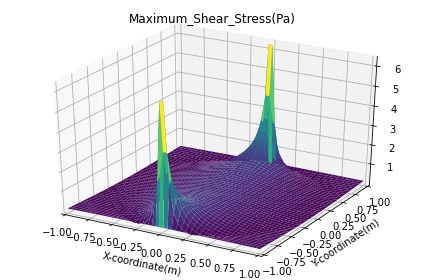

In [45]:
R_1=1
P_1=1
from sympy.plotting import plot, plot3d, PlotGrid
tau_max = (sym.sqrt((0.5*(sigmaxx_s1-sigmayy_s1))**2 +sigmaxy_s1**2)).simplify()
display(Math(r'\tau_{{xy}}^{{max}} = {}'.format(sym.latex(tau_max))))
R_1=1
P_1=1
tau_maxgrph = tau_max.subs([(R,R_1),(P,P_1)])
p5 = plot3d(tau_maxgrph, (x, -1, 1), (y, -1, 1),xlabel="X-coordinate(m)",ylabel="Y-coordinate(m)",title="Maximum_Shear_Stress(Pa)")

Stress variation in polar coordinates can be shown by plotting the graphs of $ \sigma_{{rr}}\ $, $ \sigma_{{rt}}\ $ and $ \sigma_{{tt}}\ $  with respect to r and theta variation. So, let us convert the state of stress obtained in cartesian coordinates to polar coordinates and subsitute the radius to be 1m and the applied force to be 1N/m to obtain $ \sigma_{{rr}}^{{solutiongraph}}\ $, $ \sigma_{{tt}}^{{solutiongraph}}\ $ and $ \sigma_{{rt}}^{{solutiongraph}}\ $. Finally the mentioned graphs are plotted for variation in r and t(theta) going from -2$ \pi\ $ to 2$ \pi\ $

In [33]:
r,theta = sym.symbols('r,theta')
sigma_rectsol = sym.Matrix([[sigmaxx_s1, sigmaxy_s1],[sigmaxy_s1 , sigmayy_s1]])

Q = sym.Matrix([[sym.cos(theta) , sym.sin(theta)],[-sym.sin(theta) , sym.cos(theta)]])

sigma_polarsol = (Q)*sigma_rectsol*(Q.T)
sigma_rrsol = (((sigma_polarsol[0,0])).subs([(x,r*sym.cos(theta)),(y,r*sym.sin(theta))])).simplify()
sigma_ttsol =  ((sigma_polarsol[1,1]).subs([(x,r*sym.cos(theta)),(y,r*sym.sin(theta))])).simplify()
sigma_rtsol = ((sigma_polarsol[0,1]).subs([(x,r*sym.cos(theta)),(y,r*sym.sin(theta))])).simplify()
sigma_trsol = ((sigma_polarsol[1,0]).subs([(x,r*sym.cos(theta)),(y,r*sym.sin(theta))])).simplify()
display(Math(r'\sigma_{{rr}}^{{solution}} = {}'.format(sym.latex(sigma_rrsol))))
display(Math(r'\sigma_{{\theta\theta}}^{{solution}} = {}'.format(sym.latex(sigma_ttsol))))
display(Math(r'\sigma_{{r\theta}}^{{solution}} = {}'.format(sym.latex(sigma_rtsol))))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [36]:

sigma_rrgrph = sigma_rrsol.subs([(R,R_1),(P,P_1)])
display(Math(r'\sigma_{{rr}}^{{solution graph}} = {}'.format(sym.latex(sigma_rrgrph))))
sigma_ttgrph = sigma_ttsol.subs([(R,R_1),(P,P_1)])
display(Math(r'\sigma_{{\theta\theta}}^{{solution graph}} = {}'.format(sym.latex(sigma_ttgrph))))
sigma_rtgrph = sigma_rtsol.subs([(R,R_1),(P,P_1)])
display(Math(r'\sigma_{{r\theta}}^{{solution graph}} = {}'.format(sym.latex(sigma_rtgrph))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

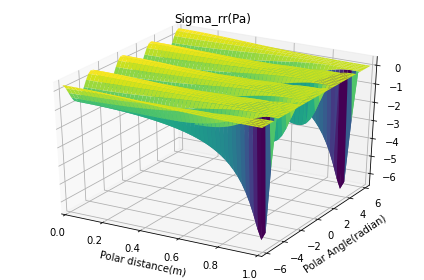

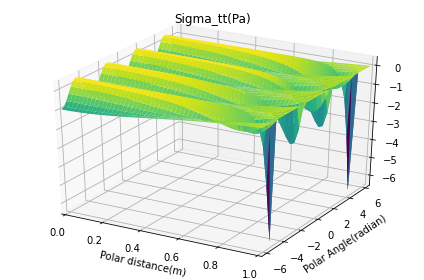

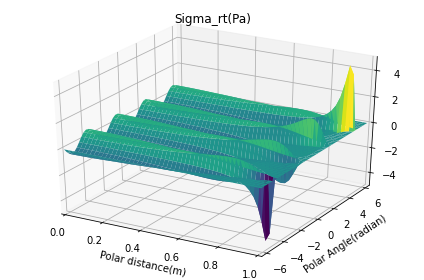

In [41]:
p1 = plot3d(sigma_rrgrph, (r, 0, 1), (theta, -2*sym.pi, 2*sym.pi),xlabel="Polar distance(m)",ylabel="Polar Angle(radian)",zlabel="h",title="Sigma_rr(Pa)")
p2 = plot3d(sigma_ttgrph, (r, 0, 1), (theta, -2*sym.pi, 2*sym.pi),xlabel="Polar distance(m)",ylabel="Polar Angle(radian)",title="Sigma_tt(Pa)")
p3 = plot3d(sigma_rtgrph, (r, 0, 1), (theta, -2*sym.pi, 2*sym.pi),xlabel="Polar distance(m)",ylabel="Polar Angle(radian)",title="Sigma_rt(Pa)")

Let us try to find the stresses $ \sigma_{{xy}}\ $, $ \sigma_{{yy}}\ $ and $ \sigma_{{xy}}\ $ along x-axis(y=0) and its variation

<IPython.core.display.Math object>

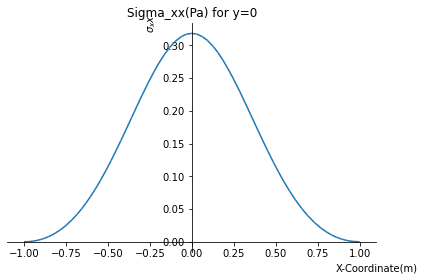

<IPython.core.display.Math object>

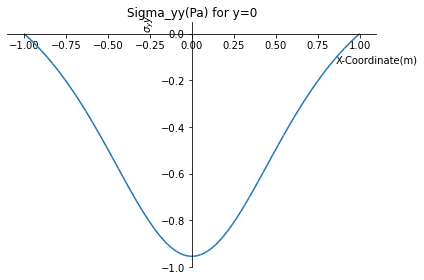

<IPython.core.display.Math object>

In [61]:
sigmaxx_xaxis = sigmaxx_s1.subs([(R,R_1),(P,P_1),(y,0)])
display(Math(r'\sigma_{{xx}}^{{x-axis}} = {}'.format(sym.latex(sigmaxx_xaxis))))
graph = plot(sigmaxx_xaxis, (x,-1,1),xlabel="X-Coordinate(m)",ylabel='$ \sigma_xx\ $',title="Sigma_xx(Pa) for y=0")
sigmayy_xaxis = sigmayy_s1.subs([(R,R_1),(P,P_1),(y,0)])
display(Math(r'\sigma_{{yy}}^{{x-axis}} = {}'.format(sym.latex(sigmayy_xaxis))))
sigmaxy_xaxis = sigmaxy_s1.subs([(R,R_1),(P,P_1),(y,0)])
graph2 = plot(sigmayy_xaxis, (x,-1,1),xlabel="X-Coordinate(m)",ylabel='$ \sigma_yy\ $',title="Sigma_yy(Pa) for y=0")
display(Math(r'\sigma_{{xy}}^{{x-axis}} = {}'.format(sym.latex(sigmaxy_xaxis))))



Let us try to find the stresses $ \sigma_{{xy}}\ $, $ \sigma_{{yy}}\ $ and $ \sigma_{{xy}}\ $ along x-axis(y=0) and its variation

<IPython.core.display.Math object>

<IPython.core.display.Math object>

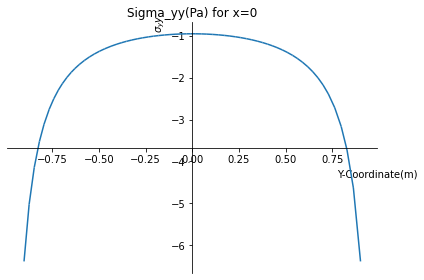

<IPython.core.display.Math object>

In [64]:
sigmaxx_yaxis = sigmaxx_s1.subs([(R,R_1),(P,P_1),(x,0)])
display(Math(r'\sigma_{{xx}}^{{y-axis}} = {}'.format(sym.latex(sigmaxx_yaxis))))
sigmayy_yaxis = sigmayy_s1.subs([(R,R_1),(P,P_1),(x,0)])
display(Math(r'\sigma_{{yy}}^{{y-axis}} = {}'.format(sym.latex(sigmayy_yaxis))))
sigmaxy_yaxis = sigmaxy_s1.subs([(R,R_1),(P,P_1),(x,0)])
graph2 = plot(sigmayy_yaxis, (y,-0.9,0.9),xlabel="Y-Coordinate(m)",ylabel='$ \sigma_yy\ $',title="Sigma_yy(Pa) for x=0")
display(Math(r'\sigma_{{xy}}^{{x-axis}} = {}'.format(sym.latex(sigmaxy_xaxis))))



Conclusion:


    A)From the graph of stresses along x axis in x and y direction, we can state that maximum stress occurs at y=0, thus failure if occured occurs at y=0 along x axis.
    B)From graph of stresses along along y axis in x and y direction, we can note that stress along y axis is constant and of maginitude 
$$ \frac{2P}{πd}\ $$

     This result is the primary basis of using the geometry for indirect tension testing. Knowing the 
    sample size and failure (fracture) loading, the simple stress relation allows the determination of the failing tensile stress or material strength.This test type is called as indirect tension test.
    
        Also above problem solution methodology can be used to study behaviour of granular material. Particles in such models are commonly loaded through multiple contacts with neighboring grains, and the particular example particle shown has four contact loads in below figure. Assuming the loadings are in-line and along two perpendicular diameters, using superposition as done in our problem we can determine the stress field within the model particle.
   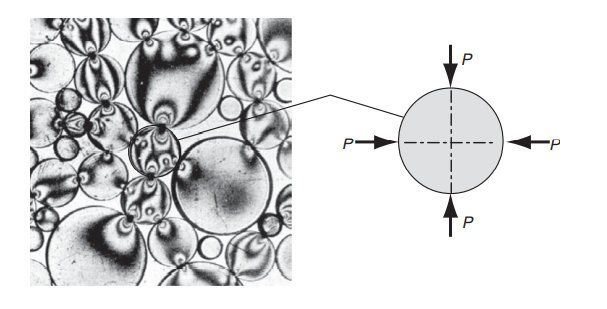
Work Distribution:-

 Balasaheb: 1. Theoretical Solution and reference study.
            2. Solution Methodology Flowchart.
            3. Markdown cell content.
            4. Proofreading.
    Akshay: 1. Theoretical Solution and reference study.
            2. Solution Methodology Flowchart.
            3. Solution and Syntax Formulation in Jupyter Notebook.
            4. Graph Plotting.
 Deepanshu: 1. Theoretical Solution and reference study.
            2. Compilation of Solution Mehodology Flowchart.
            3. Solution and Syntax Formulation in Jupyter Notebook.
            4. Proofreading.
            
References: 
            1. Elasticity- Theory, Applications and Numerics by Martin H. Sadd, Fourth Edition,  Page 211.
            2. Theory of Elasticity by S.Timoshenko and J. N. Goodier, Second Edition, Page 107.
            3. Rocha, João Augusto de Lima, & Wahrhaftig, Alexandre de Macêdo. (2016). Superposition of Stress Fields in Diametrically Compressed Cylinders. Latin American Journal of Solids and Structures, 13(10), 1954- 1967
